In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf

In [2]:
# Downloading stock data using yfinance
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'
data = yf.download(stock, start, end)
data.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Data preprocessing
data.dropna(inplace=True)
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)])


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler_linear = MinMaxScaler(feature_range=(0, 1))
data_train_scale = scaler_linear.fit_transform(data_train)

In [5]:
X_linear, y_linear = [], []
for i in range(100, data_train_scale.shape[0]):
    X_linear.append(data_train_scale[i-100:i])
    y_linear.append(data_train_scale[i, 0])
X_linear, y_linear = np.array(X_linear), np.array(y_linear)

In [6]:
# Splitting the data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)


In [7]:
# Reshape X_train_linear and X_test_linear to 2D
X_train_linear_2d = X_train_linear.reshape(X_train_linear.shape[0], -1)
X_test_linear_2d = X_test_linear.reshape(X_test_linear.shape[0], -1)


In [8]:
# Creating and training the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_linear_2d, y_train_linear)


LinearRegression()

In [9]:
# Predicting on the test set
y_pred_linear = linear_model.predict(X_test_linear_2d)


In [10]:
# Scaling back the predictions and actual values
y_pred_linear = y_pred_linear * scaler_linear.scale_
y_test_linear = y_test_linear * scaler_linear.scale_

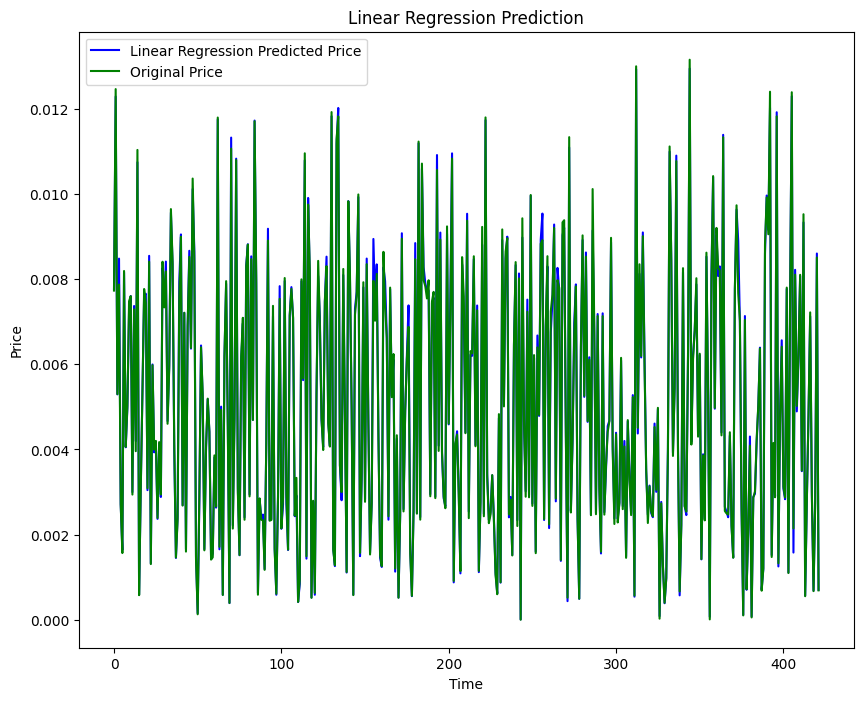

In [11]:
# Plotting the results
plt.figure(figsize=(10, 8))
plt.plot(y_pred_linear, 'b', label='Linear Regression Predicted Price')
plt.plot(y_test_linear, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Linear Regression Prediction')
plt.show()

In [12]:
# Evaluating the model
mse_linear = mean_squared_error(y_test_linear, y_pred_linear)
r2_linear = r2_score(y_test_linear, y_pred_linear)
print(f'Mean Squared Error (Linear Regression): {mse_linear}')
print(f'R-squared (Linear Regression): {r2_linear}')

Mean Squared Error (Linear Regression): 2.6183554682070142e-08
R-squared (Linear Regression): 0.9973586136293363
